In [1]:
import pandas as pd
df=pd.read_csv("cricket.csv",encoding = 'unicode_escape')

In [2]:
df.columns

Index(['Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR',
       '100', '50', '0'],
      dtype='object')

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,random_state=100)

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
encoded = df.apply(le.fit_transform)
print(encoded)

    Player  Span  Mat  Inns  NO  Runs  HS  Ave  BF  SR  100  50   0
0       63    18   61    68  31    78  56   68  78  59   27  40  16
1       34    46   58    65  31    77  43   57  77  42   23  39  11
2       57    32   55    63  29    76  41   58  76  47   26  36  16
3       66    17   59    67  10    75  53    9  70  69   25  33  21
4       18    40   60    66  29    74  27   14  75  43   18  35  19
..     ...   ...  ...   ...  ..   ...  ..  ...  ..  ..  ...  ..  ..
74      12     0    0     0   5     4  17   69  28   4   10   5   0
75      46    51    6     2  22     3  61   62  14  20    0  16   2
76      51    49   16    18  27     2   8   26  10  37    4   1   3
77       3    38   17     7  24     1  37   47   0  70    5   4  11
78       8    35   37    37  38     0   3    2   4  52    2   0  10

[79 rows x 13 columns]


In [5]:
df1=encoded.copy()
df1["Name"]=df["Player"]
print(df1)

    Player  Span  Mat  Inns  NO  Runs  HS  Ave  BF  SR  100  50   0  \
0       63    18   61    68  31    78  56   68  78  59   27  40  16   
1       34    46   58    65  31    77  43   57  77  42   23  39  11   
2       57    32   55    63  29    76  41   58  76  47   26  36  16   
3       66    17   59    67  10    75  53    9  70  69   25  33  21   
4       18    40   60    66  29    74  27   14  75  43   18  35  19   
..     ...   ...  ...   ...  ..   ...  ..  ...  ..  ..  ...  ..  ..   
74      12     0    0     0   5     4  17   69  28   4   10   5   0   
75      46    51    6     2  22     3  61   62  14  20    0  16   2   
76      51    49   16    18  27     2   8   26  10  37    4   1   3   
77       3    38   17     7  24     1  37   47   0  70    5   4  11   
78       8    35   37    37  38     0   3    2   4  52    2   0  10   

                           Name  
0          SR Tendulkar (INDIA)  
1   KC Sangakkara (Asia/ICC/SL)  
2          RT Ponting (AUS/ICC)  
3       ST 

In [6]:
y_predicted = km.fit_predict(encoded[['Ave','SR']])
y_predicted

array([1, 1, 1, 0, 0, 3, 3, 3, 3, 1, 1, 3, 0, 1, 2, 1, 0, 0, 0, 3, 0, 3,
       2, 3, 0, 1, 0, 0, 2, 1, 2, 0, 3, 2, 1, 2, 2, 0, 3, 3, 2, 0, 1, 2,
       0, 2, 1, 2, 2, 1, 0, 3, 2, 0, 2, 2, 3, 0, 2, 1, 0, 0, 3, 1, 1, 1,
       0, 2, 3, 2, 1, 2, 2, 2, 3, 3, 0, 1, 0])

In [7]:
df1['cluster']=y_predicted
print(df1)

    Player  Span  Mat  Inns  NO  Runs  HS  Ave  BF  SR  100  50   0  \
0       63    18   61    68  31    78  56   68  78  59   27  40  16   
1       34    46   58    65  31    77  43   57  77  42   23  39  11   
2       57    32   55    63  29    76  41   58  76  47   26  36  16   
3       66    17   59    67  10    75  53    9  70  69   25  33  21   
4       18    40   60    66  29    74  27   14  75  43   18  35  19   
..     ...   ...  ...   ...  ..   ...  ..  ...  ..  ..  ...  ..  ..   
74      12     0    0     0   5     4  17   69  28   4   10   5   0   
75      46    51    6     2  22     3  61   62  14  20    0  16   2   
76      51    49   16    18  27     2   8   26  10  37    4   1   3   
77       3    38   17     7  24     1  37   47   0  70    5   4  11   
78       8    35   37    37  38     0   3    2   4  52    2   0  10   

                           Name  cluster  
0          SR Tendulkar (INDIA)        1  
1   KC Sangakkara (Asia/ICC/SL)        1  
2          RT Pont

In [8]:
k = df1[df1['Name']=="V Kohli (INDIA)"]['cluster']
x=print(k.iloc[0])
type(x)

1


NoneType

In [9]:
a = df1[df1['cluster']==1]['Name']
a

0            SR Tendulkar (INDIA)
1     KC Sangakkara (Asia/ICC/SL)
2            RT Ponting (AUS/ICC)
9                BC Lara (ICC/WI)
10                TM Dilshan (SL)
13          MS Dhoni (Asia/INDIA)
15        AB de Villiers (Afr/SA)
25                V Kohli (INDIA)
29                MJ Clarke (AUS)
34                   HM Amla (SA)
42              IVA Richards (WI)
46               LRPL Taylor (NZ)
49            ML Hayden (AUS/ICC)
59                SR Watson (AUS)
63                MJ Guptill (NZ)
64               MEK Hussey (AUS)
65              RG Sharma (INDIA)
70              G Gambhir (INDIA)
77                A Symonds (AUS)
Name: Name, dtype: object

In [10]:
b=df1[df1['Name']=="SR Tendulkar (INDIA)"]['cluster']
c=df1[df1['Name']=="IVA Richards (WI)"]['cluster']
print(b.iloc[0])
print(c.iloc[0])

1
1


Text(0, 0.5, 'SR')

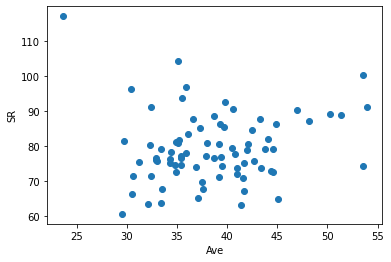

In [12]:
from matplotlib import pyplot as plt
plt.scatter(df['Ave'],df['SR'])
plt.xlabel('Ave')
plt.ylabel('SR')

Text(0, 0.5, 'Strike rate')

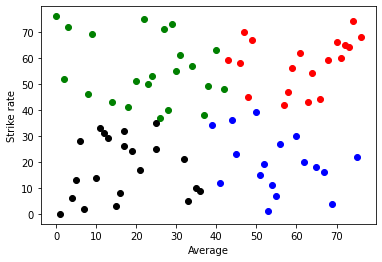

In [13]:
a1 = df1[df1.cluster==0]
a2 = df1[df1.cluster==1]
a3 = df1[df1.cluster==2]
a4 = df1[df1.cluster==3]
plt.scatter(a1['Ave'],a1['SR'],color='green')
plt.scatter(a2['Ave'],a2['SR'],color='red')
plt.scatter(a3['Ave'],a3['SR'],color='black')
plt.scatter(a4['Ave'],a4['SR'],color='blue')
plt.xlabel('Average')
plt.ylabel('Strike rate')

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_avg = silhouette_score(encoded[['Ave','SR']],y_predicted)
sil_avg

0.39877800857123874